# Sky Map of the sample used in Fermi 2025 stacking analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import astropy.coordinates as coord
import astropy.units as u

In [2]:
# Create a dictionary with the required information
data = {
    "Name": [
        "NGC 424", "NGC 788", "NGC 1194", "LEDA 86269", "ESO 362-18",
        "ESO 5-4", "Mrk 1210", "NGC 2788A", "MCG-5-23-16", "NGC 3081",
        "NGC 3227", "NGC 3393", "NGC 3516", "NGC 3783", "NGC 4051",
        "NGC 4138", "NGC 4235", "NGC 4253", "NGC 4258", "NGC 4388",
        "NGC 4395", "NGC 4507", "NGC 4593", "NGC 4941", "NGC 4939",
        "MCG-6-30-15", "4U 1344-60", "NGC 5728", "NGC 5899", "ESO 137-34",
        "NGC 6221", "NGC 6300", "ESO 103-35", "Fairall 51", "NGC 6814",
        "NGC 7172", "NGC 7314"
    ],
    "R.A.": [
         17.8652,  30.2769,  45.9546,  71.0376,  79.8992,
         91.4219, 121.0244, 135.6644, 146.9172, 149.8731,
        155.8774, 162.0978, 166.6977, 174.7571, 180.7900,
        182.3742, 184.2912, 184.6105, 184.7396, 186.4449,
        186.4537, 188.9026, 189.9143, 196.0546, 196.0597,
        203.9740, 206.9000, 220.5995, 228.7636, 248.8083,
        253.1930, 259.2481, 279.5847, 281.2250, 295.6691,
        330.5079, 338.9425
    ],
    "Dec.": [
        -38.0835,  -6.8159,  -1.1037,  28.2169, -32.6578,
        -86.6316,   5.1139, -68.2268, -30.9489, -22.8263,
         19.8651, -25.1620,  72.5687, -37.7386,  44.5313,
         43.6853,   7.1916,  29.8129,  47.3040,  12.6622,
         33.5469, -39.9093,  -5.3442,  -5.5516, -10.3395,
        -34.2956, -60.6177, -17.2530,  42.0498, -58.0800,
        -59.2170, -62.8206, -65.4276, -62.3647, -10.3236,
        -31.8696, -26.0504
    ]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Name,R.A.,Dec.
0,NGC 424,17.8652,-38.0835
1,NGC 788,30.2769,-6.8159
2,NGC 1194,45.9546,-1.1037
3,LEDA 86269,71.0376,28.2169
4,ESO 362-18,79.8992,-32.6578
5,ESO 5-4,91.4219,-86.6316
6,Mrk 1210,121.0244,5.1139
7,NGC 2788A,135.6644,-68.2268
8,MCG-5-23-16,146.9172,-30.9489
9,NGC 3081,149.8731,-22.8263


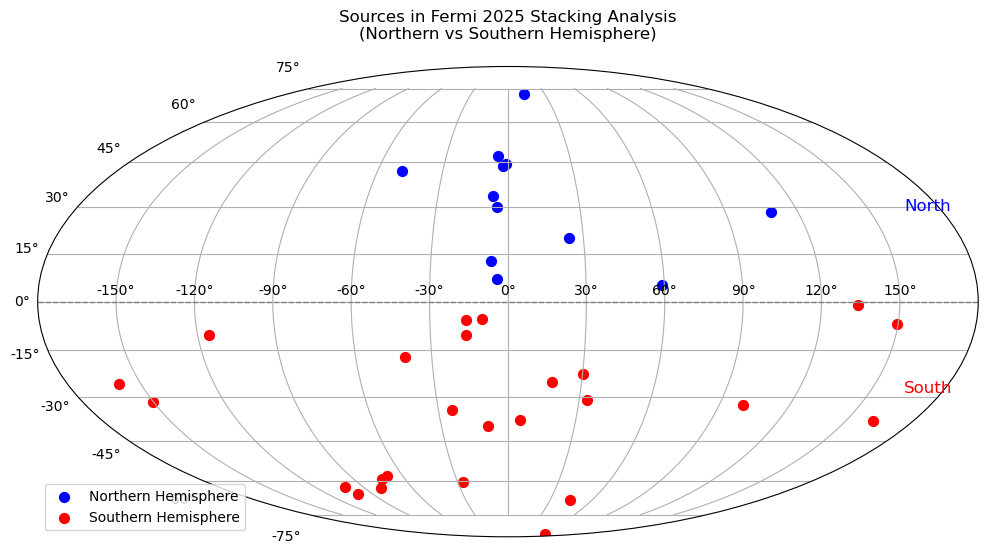

In [5]:
# Function to transform RA values for the sky map.
def transformRA(ra):
    # Flip the sign of RA and transform the coordinate range to [-π, π].
    ra = -ra
    # (The following step may be necessary depending on the input range)
    ra[ra > np.pi] -= 2 * np.pi
    ra += np.pi
    return ra

# Create SkyCoord object from the RA and Dec values.
d = coord.SkyCoord(df["R.A."], df["Dec."], unit=(u.deg, u.deg), frame='icrs', equinox='J2000')
data_ra = transformRA(d.ra.radian)
data_dec = d.dec.radian

# Determine which sources lie in the northern and southern hemispheres
north_mask = data_dec >= 0
south_mask = data_dec < 0

# Create a sky map using Mollweide projection
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection="mollweide")

# Plot the northern and southern hemisphere sources with different colors.
ax.scatter(data_ra[north_mask], data_dec[north_mask], color='blue', s=50, label='Northern Hemisphere')
ax.scatter(data_ra[south_mask], data_dec[south_mask], color='red', s=50, label='Southern Hemisphere')

# Draw a horizontal line along Dec = 0 (the equator).
ax.axhline(0, color='gray', linestyle='--', lw=1)

# Add grid, legend, and title.
ax.grid(True)
ax.set_title("Sources in Fermi 2025 Stacking Analysis\n(Northern vs Southern Hemisphere)", pad=20)
ax.legend(loc='lower left')

# You can annotate the hemispheres if desired.
ax.text(np.radians(180) - 0.1, 0.5, "North", color='blue', fontsize=12, ha='center')
ax.text(np.radians(180) - 0.1, -0.5, "South", color='red', fontsize=12, ha='center')

plt.tight_layout()
plt.show()